# Overview of this jupyter notebook

### Purpose: Data understanding of each classes without data modification
1. Loading screwing data 
2. Average curve shape in the initial phase
3. Rise point of the curves
4. Maximum value of the curves
5. Detect too low curves in initial phase
6. Rename files

In [1]:
import os
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tq
import importlib
from library import etl_data as etl        # this module contains functions that load, visualize and save the data
from library import faps_color as fapsc    # this module contains the color combination of FAPS Institute
print(importlib.reload(etl))
print(importlib.reload(fapsc))

<module 'library.etl_data' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\etl_data.py'>
<module 'library.faps_color' from 'C:\\Users\\songs\\OneDrive\\Desktop\\0. PA_FAPS\\04_Code\\library\\faps_color.py'>


## 1. Loading screwing data

In [2]:
main_path = "..\\03_Schraubprozessdaten\\einzelne_klassen\\"
folders = os.listdir(main_path)
fname = "\\ast11-graph"
fname_new = "\\class5_"

In [3]:
folders

['0_in_ordnung',
 '1_kleine_durchgangsbohrung_v2',
 '2_falsch_ausgerichtete_fuegepartner_v3',
 '3_unebene_fuegeflaeche',
 '4_verunreinigtes_gewinde',
 '5_verschmutzte_schraube',
 '6_fremdkoerper_am_gewindeende',
 '7_beschaedigte_schraube']

In [4]:
class5 = '5_verschmutzte_schraube'

In [5]:
def set_time(df, len_curves):
    
    original_time_step = 0.000175
    max_time = max(len_curves)*original_time_step
    len_datapoints = len(df)
    time_steps = round(max_time/len_datapoints, 4)
    
    timeline = []

    for i in range(len_datapoints):
        i = round(i*time_steps, 4)
        timeline.append(i)
        
    return np.array(timeline).reshape(-1, 1)

In [6]:
def load_data(main_path, folders, fname, downsample, file_amount):
    
    arr = []
    len_curves = []
    short_curves = []
    low_curves = []
    
    for i in tq(range(file_amount)):
        try:
            file_path = main_path + folders + fname + str(i) + ".csv"
            data = pd.read_csv(file_path, encoding = 'ISO-8859-1')["Drehmoment(N·m)"]
            arr.append(data)
            len_curves.append(len(data))
        except:
            print(i)
        
    for index, length in enumerate(len_curves): 
        if length < np.max(len_curves)*0.8:
            short_curves.append(index)
        
    df = pd.concat(arr, axis=1, ignore_index=True)
    df = df[:][::downsample]
    df = df.reset_index(drop=True)
    df[df < 0] = np.nan
    df = df.fillna(0)
    
    for col in df:
        if max(df[col]) < 1.0:
            low_curves.append(col)
    
    return df, len_curves, short_curves, low_curves

In [7]:
df5, len_curves, short_curves, low_curves = load_data(main_path, class5, fname_new, downsample=20, file_amount=200)

  0%|          | 0/200 [00:00<?, ?it/s]

In [8]:
df5

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.00448,0.01792,0.00000,0.02240,0.02240,0.00448,0.03584,0.00000,0.01792,0.03136,...,0.00000,0.04032,0.00000,0.00448,0.01344,0.01344,0.01344,0.00448,0.03584,0.00000
1,0.00448,0.01792,0.00000,0.01792,0.01792,0.00448,0.03584,0.00000,0.01792,0.03136,...,0.00000,0.03584,0.00448,0.00448,0.01344,0.01344,0.01344,0.00000,0.03136,0.00000
2,0.01344,0.02240,0.00448,0.00448,0.00448,0.00000,0.01344,0.00448,0.00896,0.01344,...,0.00448,0.01344,0.00448,0.00896,0.01344,0.01792,0.01344,0.00448,0.01344,0.00448
3,0.00448,0.01344,0.00896,0.00448,0.00000,0.00000,0.00000,0.00448,0.00448,0.00448,...,0.00000,0.00896,0.00448,0.00896,0.00448,0.00896,0.00896,0.00000,0.00896,0.00448
4,0.01344,0.02240,0.01344,0.00448,0.00896,0.00448,0.00896,0.00448,0.00896,0.01344,...,0.00896,0.01344,0.01344,0.01344,0.01344,0.01792,0.01344,0.00448,0.01344,0.00896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.56000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.17024,0.00000,0.00000,0.00000
762,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.49728,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
763,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.40768,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
764,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.23296,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [9]:
short_curves

[]

In [10]:
low_curves

[]

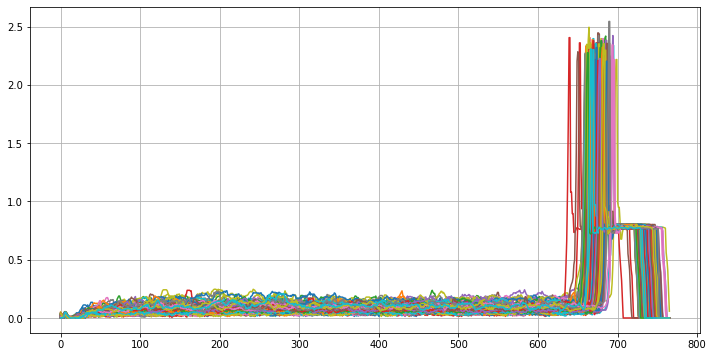

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df5)
plt.grid()
plt.show()

## 2. Average curve shape in the initial phase

In [117]:
df5p1 = df5.iloc[:600]
df5p1

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.00448,0.01792,0.00000,0.02240,0.02240,0.00448,0.03584,0.00000,0.01792,0.03136,...,0.00000,0.04032,0.00000,0.00448,0.01344,0.01344,0.01344,0.00448,0.03584,0.00000
1,0.00448,0.01792,0.00000,0.01792,0.01792,0.00448,0.03584,0.00000,0.01792,0.03136,...,0.00000,0.03584,0.00448,0.00448,0.01344,0.01344,0.01344,0.00000,0.03136,0.00000
2,0.01344,0.02240,0.00448,0.00448,0.00448,0.00000,0.01344,0.00448,0.00896,0.01344,...,0.00448,0.01344,0.00448,0.00896,0.01344,0.01792,0.01344,0.00448,0.01344,0.00448
3,0.00448,0.01344,0.00896,0.00448,0.00000,0.00000,0.00000,0.00448,0.00448,0.00448,...,0.00000,0.00896,0.00448,0.00896,0.00448,0.00896,0.00896,0.00000,0.00896,0.00448
4,0.01344,0.02240,0.01344,0.00448,0.00896,0.00448,0.00896,0.00448,0.00896,0.01344,...,0.00896,0.01344,0.01344,0.01344,0.01344,0.01792,0.01344,0.00448,0.01344,0.00896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.03584,0.12096,0.06272,0.04032,0.14784,0.07168,0.12544,0.10752,0.11648,0.14336,...,0.08960,0.06720,0.05824,0.07168,0.06272,0.08512,0.09856,0.08512,0.11200,0.08512
596,0.04480,0.12992,0.06272,0.04032,0.17024,0.08064,0.12544,0.09856,0.12992,0.13440,...,0.08960,0.07616,0.04928,0.07168,0.05376,0.08064,0.10304,0.07616,0.10752,0.07616
597,0.03584,0.12544,0.07168,0.04928,0.17472,0.07168,0.12096,0.10304,0.12096,0.10752,...,0.09408,0.06720,0.05824,0.05824,0.05376,0.07616,0.11200,0.08960,0.10752,0.07616
598,0.05376,0.09856,0.06720,0.04480,0.15680,0.05824,0.11200,0.10304,0.11200,0.09408,...,0.08960,0.04928,0.05824,0.05824,0.04928,0.08064,0.11200,0.08512,0.10304,0.08064


In [118]:
np.mean(df5p1, axis=1)

0      0.016554
1      0.015635
2      0.010506
3      0.005174
4      0.011670
         ...   
595    0.078288
596    0.076832
597    0.077661
598    0.076832
599    0.076182
Length: 600, dtype: float64

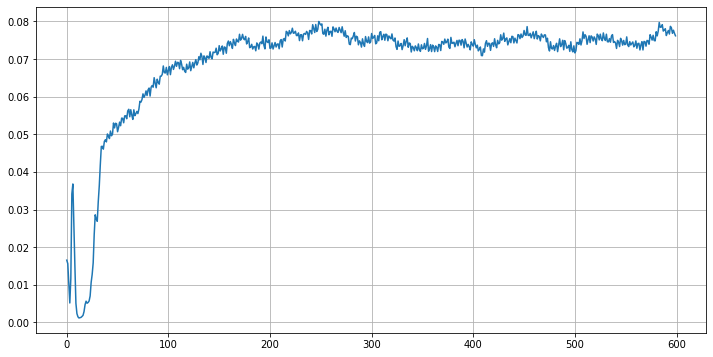

In [119]:
plt.figure(figsize=(12,6))
plt.plot(np.mean(df5p1, axis=1))
plt.grid()
plt.show()

## 3. Rise point of the curves

In [120]:
raise_point = []

for col in df5:
    for i, val in enumerate(df5[col]):
        if val > 1:
            raise_point.append(i)
            break

In [121]:
np.mean(raise_point)

672.875

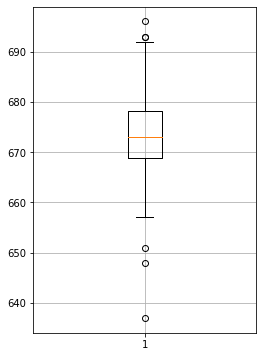

In [122]:
plt.figure(figsize=(4,6))
plt.boxplot(raise_point)
plt.grid()
plt.show()

## 4. Maximum value of the curves

In [123]:
max_values = []

for col in df5:
    max_values.append(max(df5[col]))

In [124]:
np.mean(max_values)

2.2490496

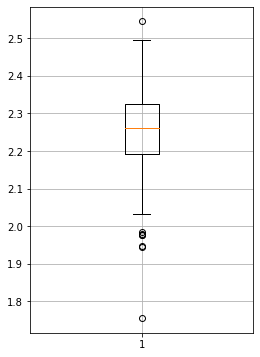

In [125]:
plt.figure(figsize=(4,6))
plt.boxplot(max_values)
plt.grid()
plt.show()

## 5. Detect too low curves in initial phase

In [97]:
p1low = []

for col in df5[good_col]:
    if (df5p1[df5p1<0.04][col].count() > 200) & (max(df5p1[col]) < 0.09):
        p1low.append(col)

In [98]:
p1low

[182, 191, 225, 254, 258, 266, 268]

In [103]:
problem_col

[5,
 9,
 10,
 13,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 25,
 28,
 29,
 30,
 46,
 106,
 115,
 117,
 119,
 120,
 121,
 125,
 128,
 130,
 133,
 136,
 139,
 141,
 159,
 160,
 162,
 165,
 170,
 171,
 183,
 184,
 187,
 190,
 195,
 197,
 198,
 205,
 211,
 213,
 215,
 216,
 217,
 218,
 219,
 221,
 227,
 228,
 229,
 230,
 234,
 236,
 237,
 242,
 249,
 260,
 262,
 182,
 191,
 225,
 254,
 258,
 266,
 268]

## 6. Rename files

In [104]:
def rename_csv(main_path, folder, fname_new, file_amount):
    
    for i in range(file_amount):
        old = os.path.join(main_path, folder, os.listdir(main_path + folder)[i])
        new = os.path.join(main_path, folder, fname_new + str(i) + ".csv")
        #print(i)
        os.rename(old, new)

In [108]:
old = os.path.join(main_path, class5, os.listdir(main_path + class5)[0])
old

'..\\Daten\\einzelne_klassen\\5_verschmutzte_schraube\\rename (1).csv'

In [109]:
new = os.path.join(main_path, class5, "class5_" + str(0) + ".csv")
new

'..\\Daten\\einzelne_klassen\\5_verschmutzte_schraube\\class5_0.csv'

In [110]:
#rename_csv(main_path, class5, "class5_", file_amount=200)